In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os

In [2]:
datadir = os.getcwd()
plot = datadir + "\\images\\"
print(plot)

C:\Users\Trivikram\Documents\DArchR\skylake\images\


In [3]:
gem5Configs = ['UnCalib','Calib','Max']
hardware = ['hardware']
benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CRd','CS1','CS3','EI','EF','ED1',
              'EM1','EM5','MI','MC','MCS','MI','MD','MIM','MIM2']
exe_benchmarks = ['ED1','EI','EF','EM1','EM5']

In [4]:
# function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        return float(r[start:end])

In [5]:
def pcmGetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 2
        end = r.find('\n', start)
       # print(r[start:end])
        return float(r[start:end])

In [6]:
rows = []
for config in gem5Configs:
    cdir = datadir + '\\results\\' + config + '\\'
    for bm in benchmarks:
        rows.append([config, bm,
                     gem5GetStat(cdir + bm, 'sim_ticks')/285.7, #3.5GHz
                     gem5GetStat(cdir + bm, 'sim_insts'),
                     gem5GetStat(cdir + bm, 'sim_ops'),
                     gem5GetStat(cdir + bm, 'system.cpu.ipc')])

gem5_df = pd.DataFrame(rows, columns=['config', 'benchmark', 'cycles', 'instructions', 'ops', 'ipc'])

In [7]:
rows = []
for config in hardware:
    cdir = datadir + '\\results\\' + config + '\\'
    for bm in benchmarks:
        rows.append([config, bm, pcmGetStat(cdir + bm, 'IPC')])

hardware_df = pd.DataFrame(rows, columns=['config','benchmark','ipc'])

In [8]:
def plot_bar(data_size, benchmarks, stat, norm=True):
    plt.figure()
    i = 0
    for size in sizes:
        for bench in benchmarks:
            if norm: 
                base = data_frame[(data_frame['data_size']==size)][stat].iloc[0]
            else: base = 1
            a = data_frame[(data_frame['benchmark']==bench) & (data_frame['data_size']==size)]
            plt.bar(i, a[stat].iloc[0]/base, color='grey')
            i += 1

    plt.xticks(np.arange(len(benchmarks)+1), benchmarks, rotation=40, ha='right')

In [9]:
def CreateArray(config,benchmarks,stat):
    if (config == 'hardware'):
        df = hardware_df
    else: df = gem5_df
    b = []
    for bm in benchmarks:
        a = df[(df['benchmark']==bm) & (df['config']==config)]
        b.append(a[stat].iloc[0])
    return b


<Figure size 432x288 with 0 Axes>

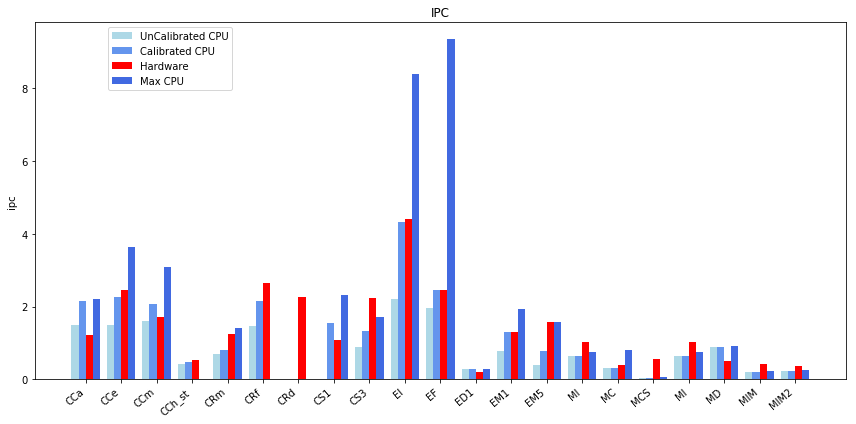

In [10]:
plot_title = 'IPC'

ylabel = 'ipc'
plt.figure()
plt.figure(figsize=(12,6))
N = np.arange(len(benchmarks))
barwidth = 0.2
displacement1 = N + barwidth
displacement2 = displacement1 + barwidth
displacement3 = displacement2 + barwidth

UnClaib_ipc = CreateArray('UnCalib',benchmarks,'ipc')
# print(UnClaib_ipc)
Calib_ipc = CreateArray('Calib',benchmarks,'ipc')
Max_ipc = CreateArray('Max',benchmarks,'ipc')
Hardware_ipc = CreateArray('hardware',benchmarks,'ipc')

plt.bar(N, UnClaib_ipc, barwidth, label='UnCalibrated CPU', color='lightblue')
plt.bar(displacement1, Calib_ipc, barwidth, label= 'Calibrated CPU', color='cornflowerblue')
plt.bar(displacement2, Hardware_ipc, barwidth, label='Hardware', color='red')
plt.bar(displacement3, Max_ipc, barwidth, label='Max CPU', color='royalblue')

plt.title(plot_title)
plt.legend(bbox_to_anchor=(0.25, 1))
plt.xticks(N+0.3, benchmarks, rotation=40, ha='right')
plt.ylabel(ylabel)
plt.tight_layout()
plt.savefig(plot + 'microbenchmark_IPC' + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

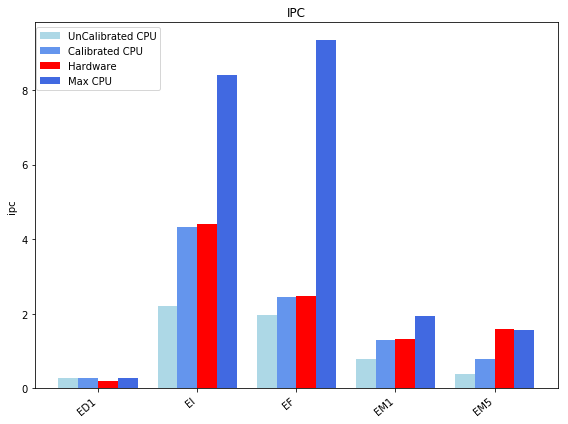

In [12]:
plot_title = 'IPC'

benchmarks = exe_benchmarks
ylabel = 'ipc'
plt.figure()
plt.figure(figsize=(8,6))
N = np.arange(len(benchmarks))
barwidth = 0.2
displacement1 = N + barwidth
displacement2 = displacement1 + barwidth
displacement3 = displacement2 + barwidth

UnClaib_ipc = CreateArray('UnCalib',benchmarks,'ipc')
# print(UnClaib_ipc)
Calib_ipc = CreateArray('Calib',benchmarks,'ipc')
Max_ipc = CreateArray('Max',benchmarks,'ipc')
Hardware_ipc = CreateArray('hardware',benchmarks,'ipc')

plt.bar(N, UnClaib_ipc, barwidth, label='UnCalibrated CPU', color='lightblue')
plt.bar(displacement1, Calib_ipc, barwidth, label= 'Calibrated CPU', color='cornflowerblue')
plt.bar(displacement2, Hardware_ipc, barwidth, label='Hardware', color='red')
plt.bar(displacement3, Max_ipc, barwidth, label='Max CPU', color='royalblue')

plt.title(plot_title)
plt.legend(bbox_to_anchor=(0.25, 1))
plt.xticks(N+0.3, benchmarks, rotation=40, ha='right')
plt.ylabel(ylabel)
plt.tight_layout()
plt.savefig(plot + 'exe_IPC' + '.png', format='png', dpi=600)